In [30]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [14]:
# Load ESM2M labor capacity data
ds_esm2m = xr.open_dataset('../data/processed/GFDL/labor_mean_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'}).isel(time=slice(30,None))

# Load CESM2 labor capacity data
ds_cesm2 = xr.open_dataset('../data/processed/CESM2/labor_mean_ens1-5.nc').rename({'__xarray_dataarray_variable__':'capacity'}).isel(time=slice(0,-1))

In [5]:
# ESM2M population data
esm2m_pop = xr.open_dataset('../data/processed/GFDL/population_regrid_esm2m.nc')['population']
esm2m_pop = esm2m_pop.where(np.isfinite(esm2m_pop),0)
esm2m_pop = esm2m_pop.rename({'latitude':'lat','longitude':'lon'})

# CESM2 population data
cesm2_pop = xr.open_dataset('../data/processed/CESM2/population_regrid_cesm2.nc')['population']
cesm2_pop = cesm2_pop.where(np.isfinite(cesm2_pop),0)
cesm2_pop = cesm2_pop.rename({'latitude':'lat','longitude':'lon'})

In [6]:
# Load ESM2M area data
land_area = xr.open_dataset('../data/processed/GFDL/esm2m.land_area')['land_area']
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
esm2m_area = land_area.where(land_mask,0)

# Load CESM2 area data
land_area = xr.open_dataset('../data/processed/CESM2/cesm2.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
cesm2_area = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})
cesm2_area = cesm2_area['land_area'].isel(ensemble=0)

# Overall Trend

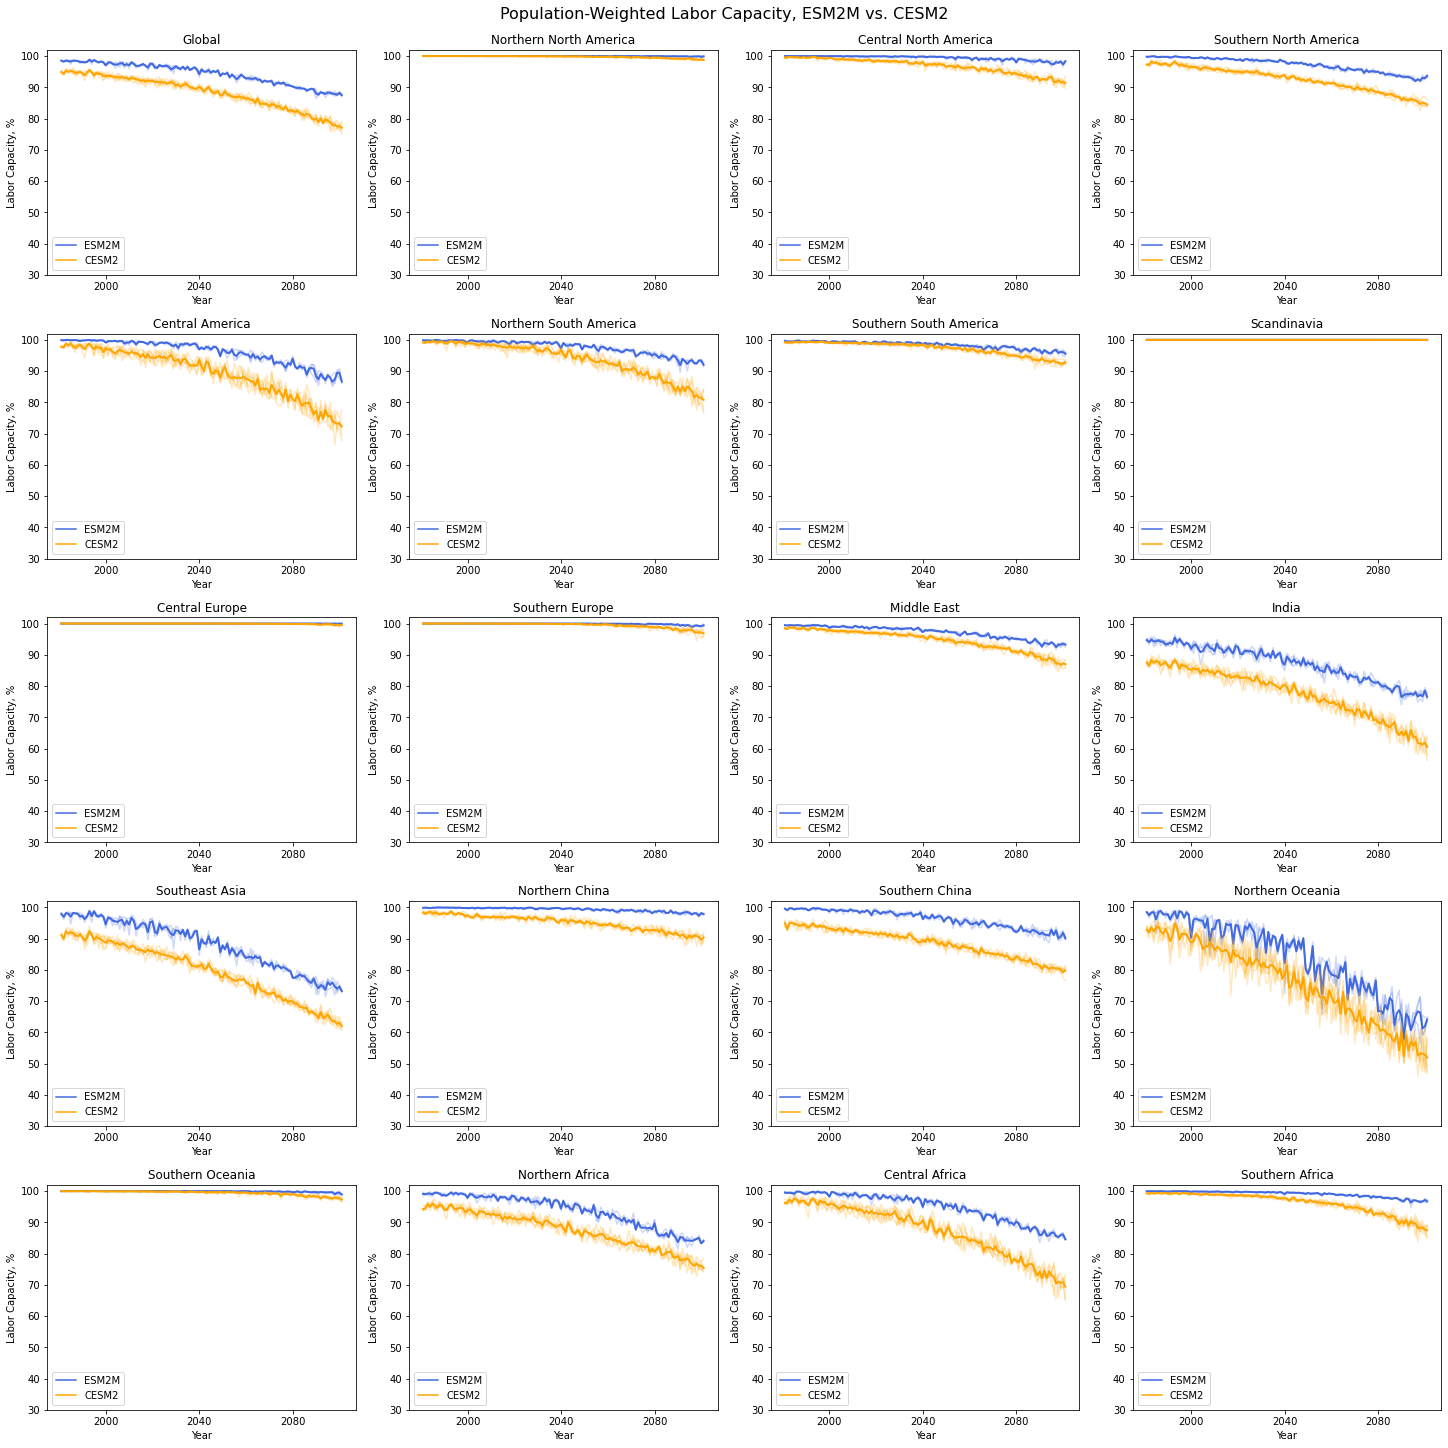

In [18]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    lf.capacity(ds_esm2m['capacity'],esm2m_pop,region,'GFDL',ax)
    lf.capacity(ds_cesm2['capacity'],cesm2_pop,region,'CESM2',ax,'orange')
    ax.set_ylim([30,102])
    blue_line = mlines.Line2D([], [], color='royalblue', label='ESM2M')
    orange_line = mlines.Line2D([], [], color='orange', label='CESM2')
    ax.legend(handles=[blue_line,orange_line],loc='lower left');
    
fig.suptitle('Population-Weighted Labor Capacity, ESM2M vs. CESM2',fontsize=16);

# Spatial Maps

## ESM2M

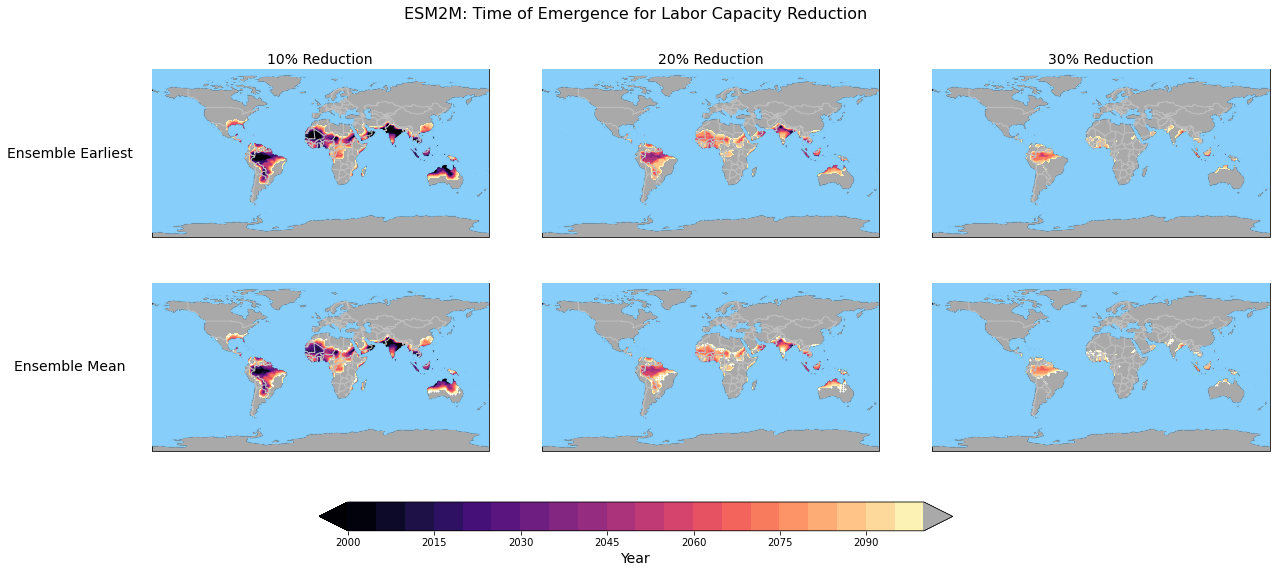

In [33]:
lf.spatial_toe(ds_esm2m['capacity'],'ESM2M: Time of Emergence for Labor Capacity Reduction')

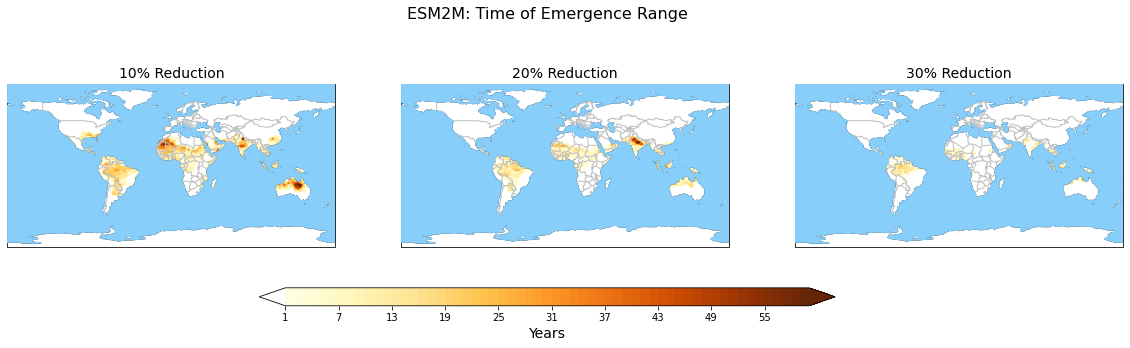

In [35]:
lf.spatial_toe_diff(ds_esm2m['capacity'],'ESM2M: Time of Emergence Range')

## CESM2

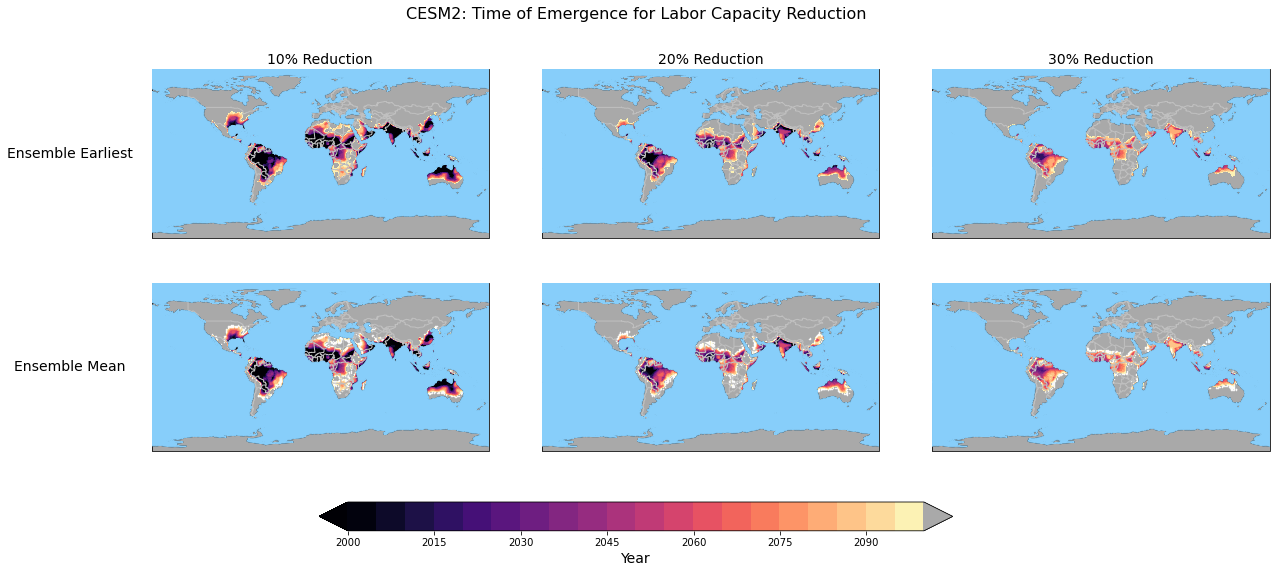

In [39]:
lf.spatial_toe(ds_cesm2['capacity'],'CESM2: Time of Emergence for Labor Capacity Reduction')

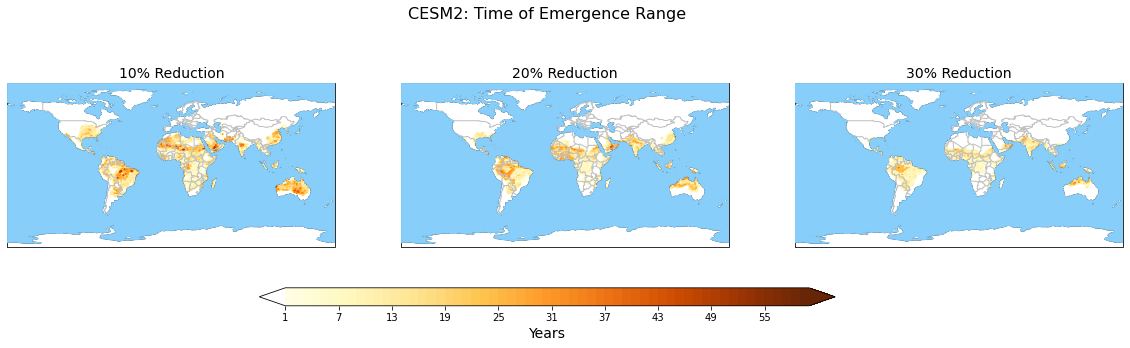

In [40]:
lf.spatial_toe_diff(ds_cesm2['capacity'],'CESM2: Time of Emergence Range')

# Bar Charts

## ESM2M

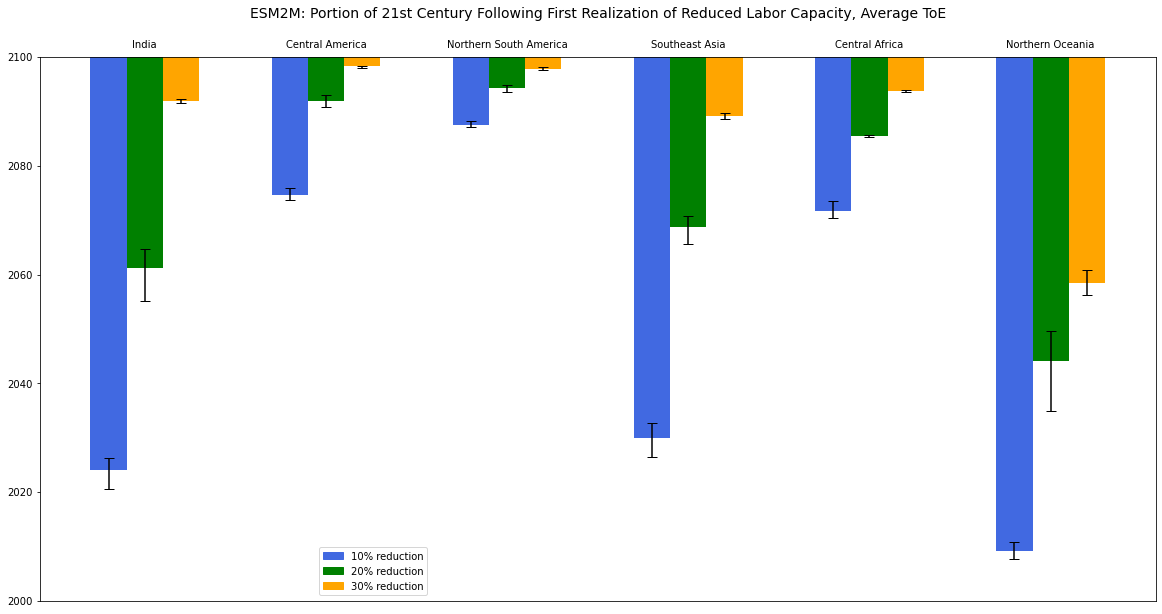

In [44]:
lf.average_toe_bar(ds_esm2m['capacity'],esm2m_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity, Average ToE\n')

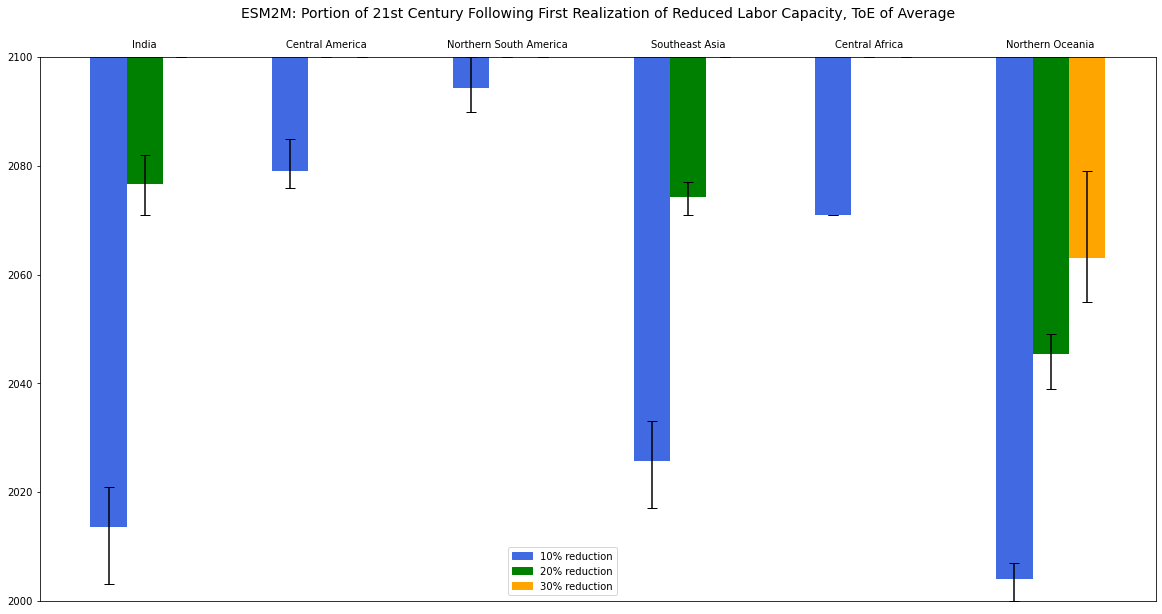

In [45]:
lf.toe_bar(ds_esm2m,esm2m_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity, ToE of Average\n')

## CESM2

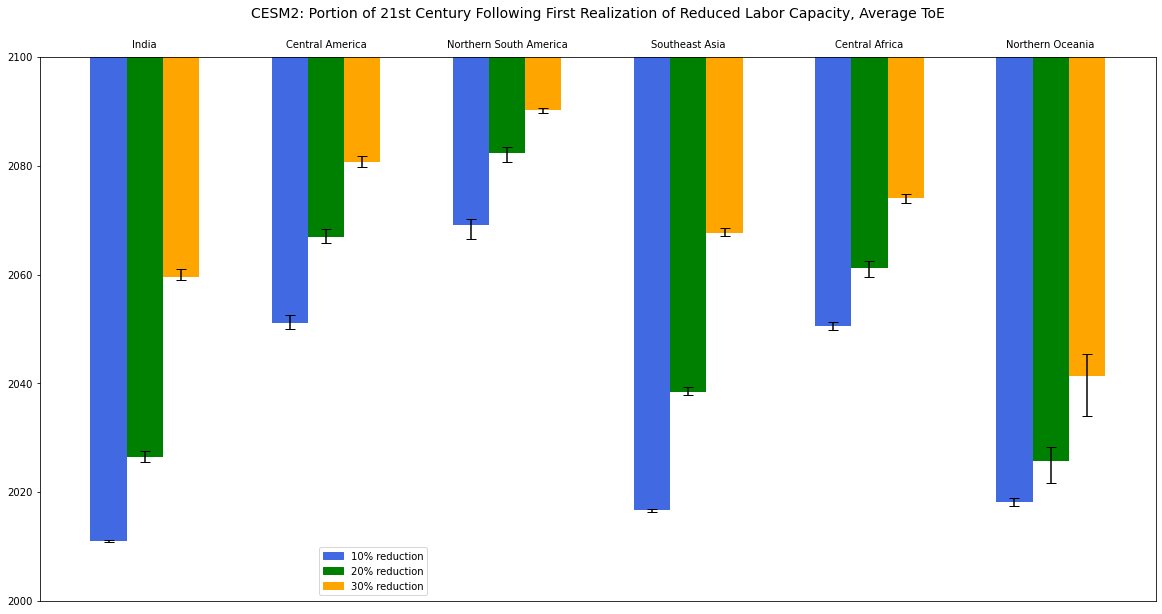

In [46]:
lf.average_toe_bar(ds_cesm2['capacity'],cesm2_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity, Average ToE\n')

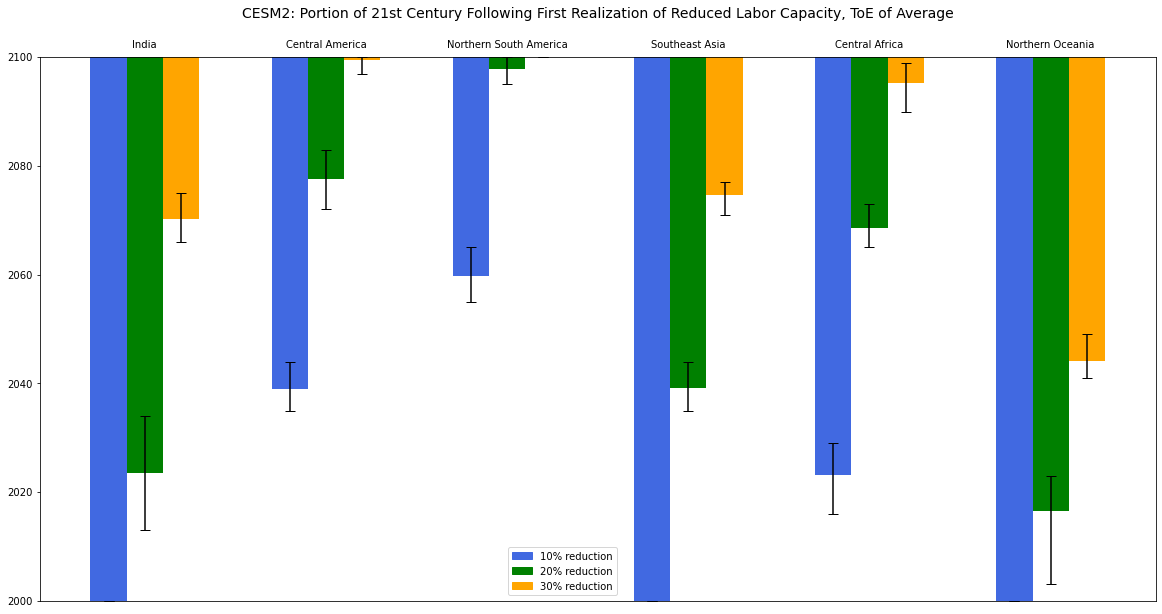

In [47]:
lf.toe_bar(ds_cesm2,cesm2_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity, ToE of Average\n')

# Population Emerged

## ESM2M

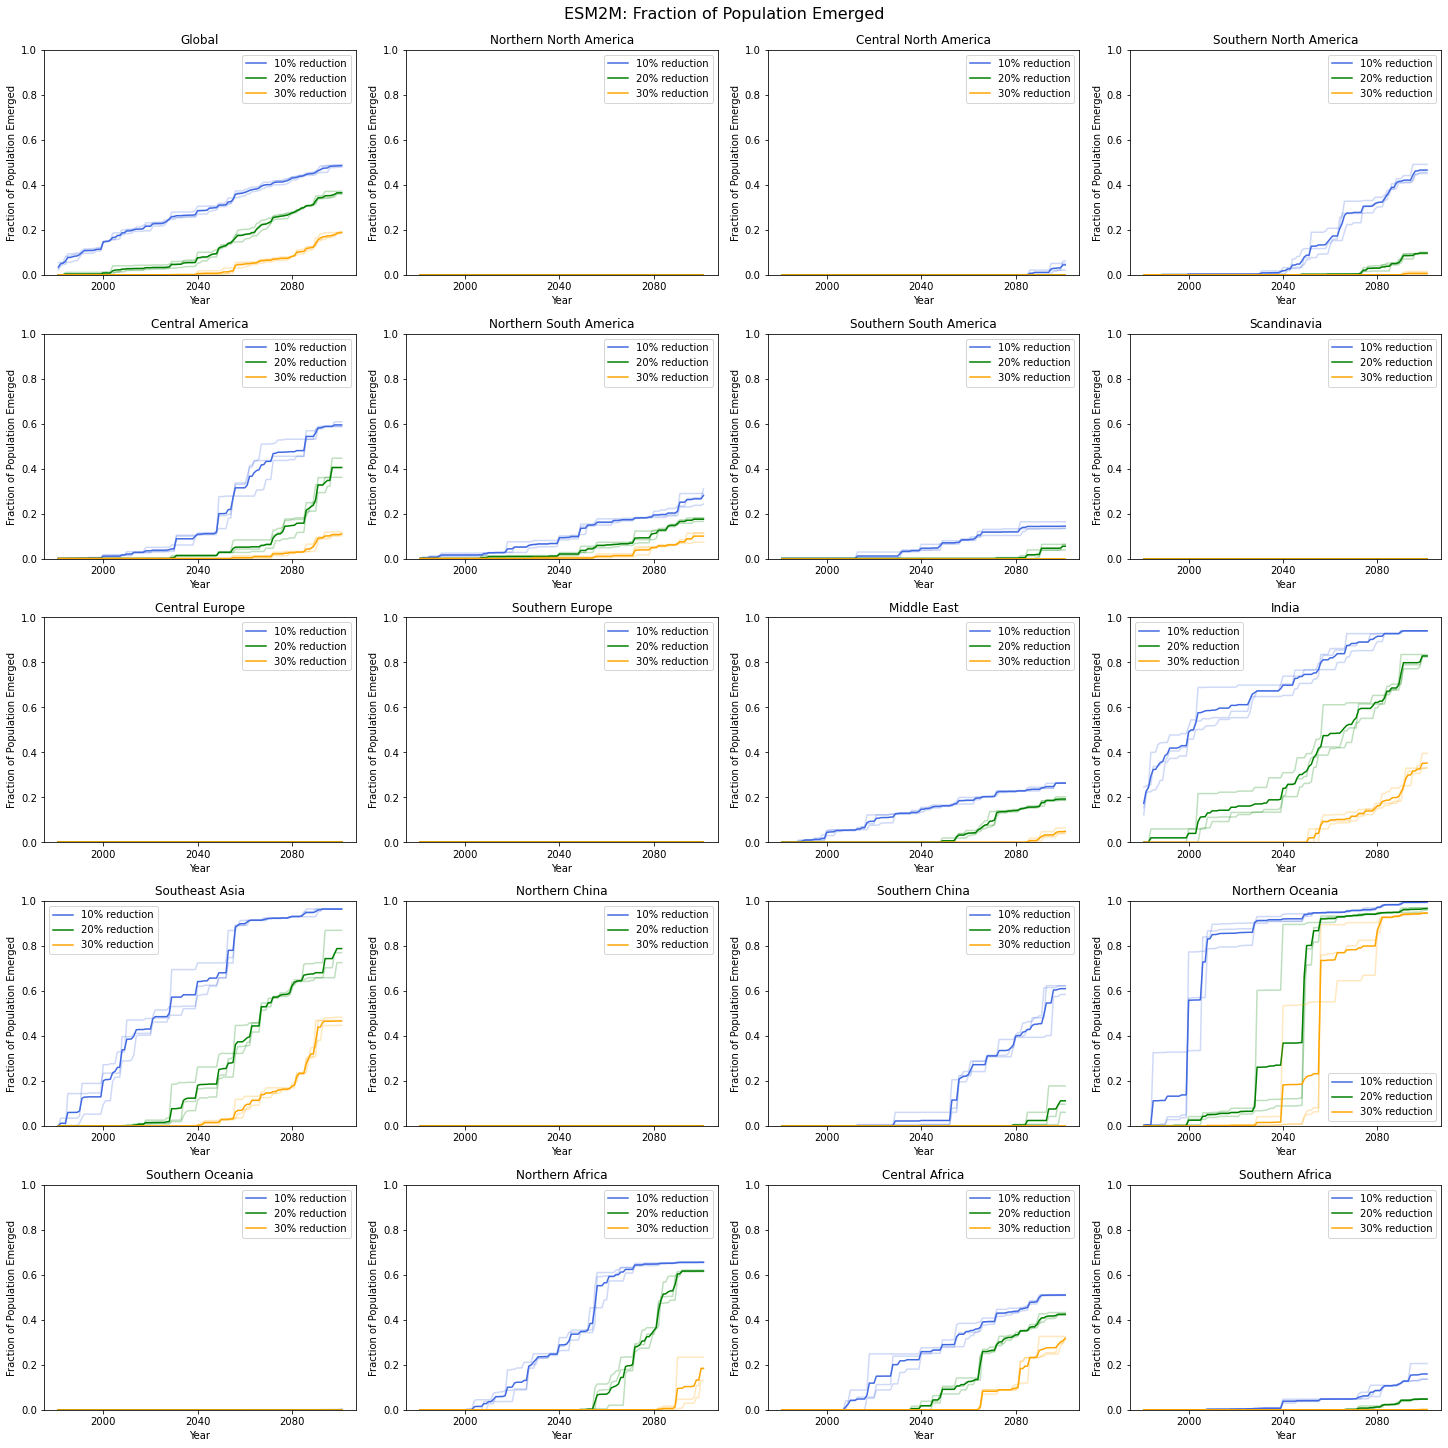

In [49]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_esm2m['capacity'],region,'GFDL')
    pop_region = lf.slice_region(esm2m_pop,region,'GFDL')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax)
    
fig.suptitle('ESM2M: Fraction of Population Emerged',fontsize=16);

## CESM2

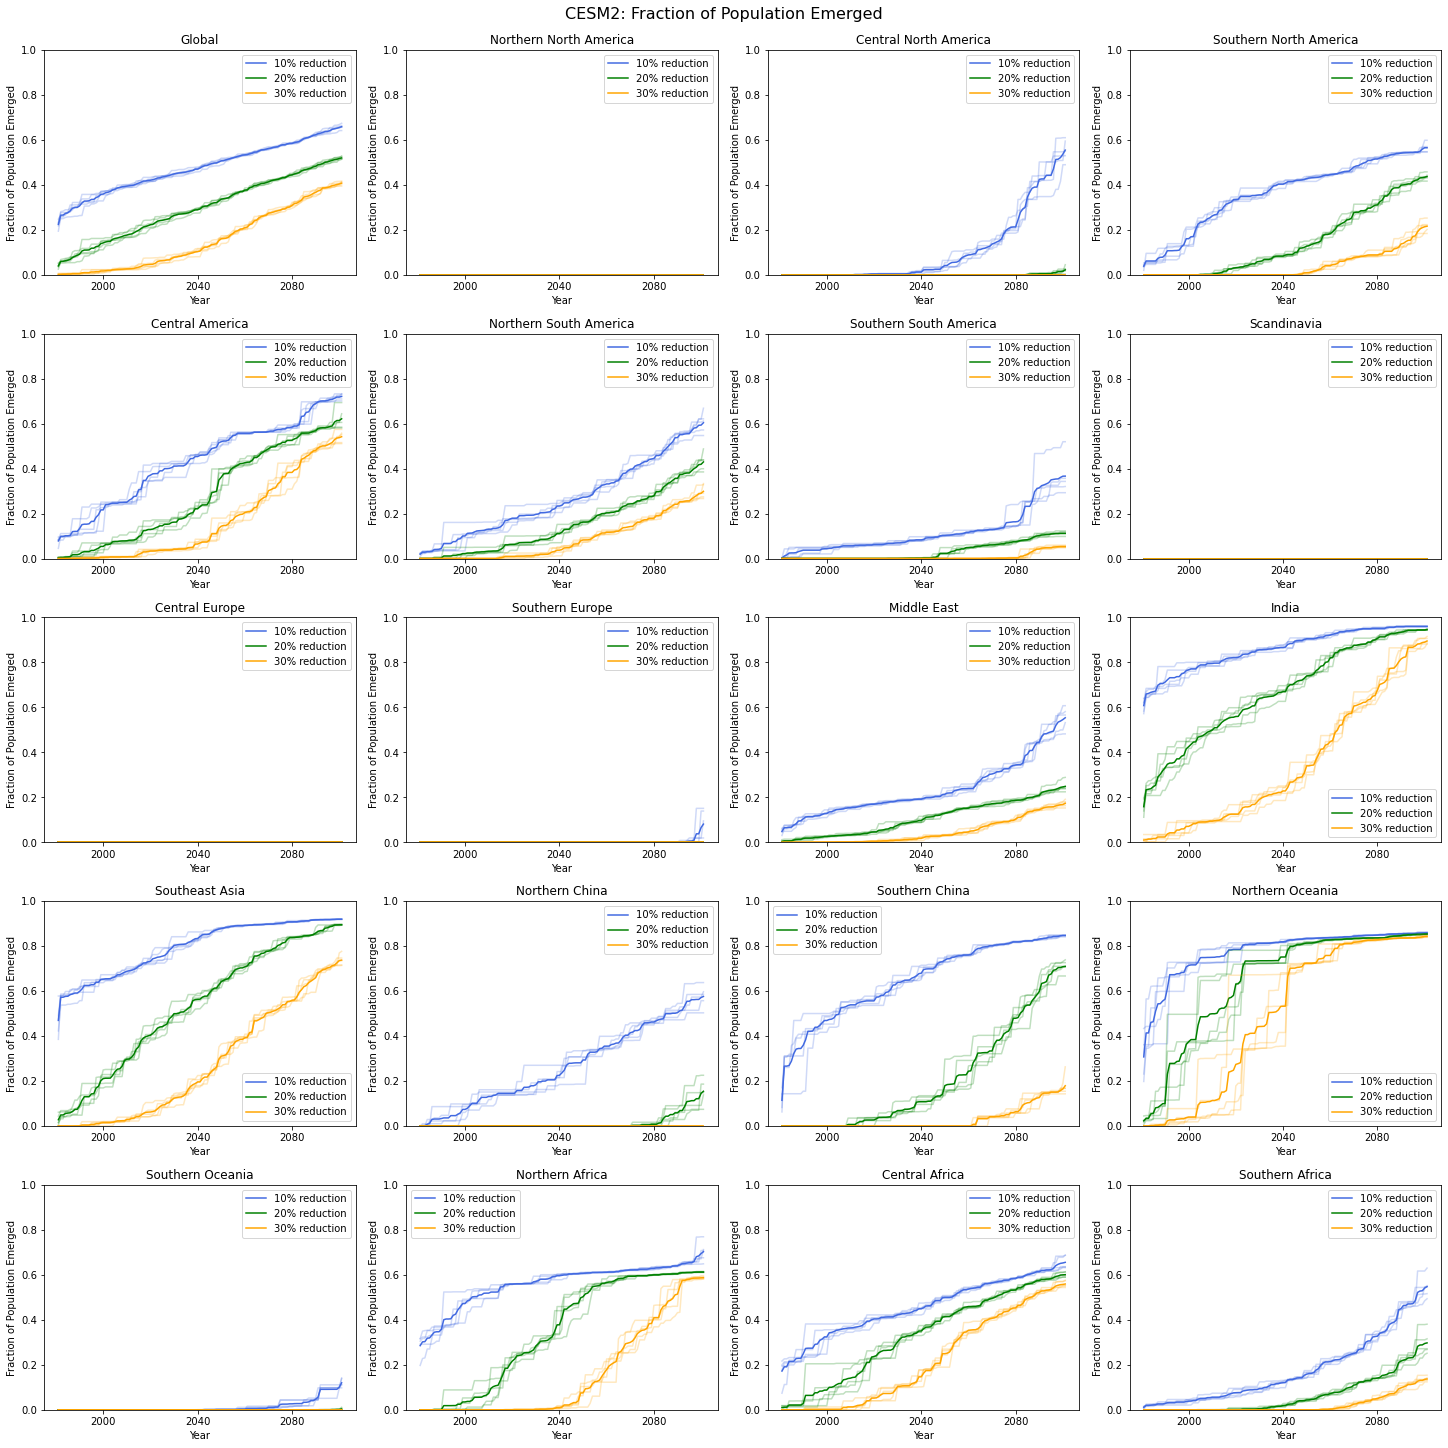

In [50]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_cesm2['capacity'],region,'CESM2')
    pop_region = lf.slice_region(cesm2_pop,region,'CESM2')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax)
    
fig.suptitle('CESM2: Fraction of Population Emerged',fontsize=16);